In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Reading all segments data(start time, end time) into individual detector dictionaries

H1={}
L1={}
V1={}
keys = {'data_seg','CAT1','CAT2','CAT3'} # dictionary keys
for ii in keys:
    temp = np.genfromtxt('H1_CBC_%s.txt'%ii,dtype=None,names = ['start','end','length'], delimiter=" ")
    H1[ii+'_start'] = temp['start']
    H1[ii+'_end'] = temp['end']
    temp = np.genfromtxt('L1_CBC_%s.txt'%ii,dtype=None,names = ['start','end','length'], delimiter=" ")
    L1[ii+'_start'] = temp['start']
    L1[ii+'_end'] = temp['end']
    temp = np.genfromtxt('V1_CBC_%s.txt'%ii,dtype=None,names = ['start','end','length'], delimiter=" ")
    V1[ii+'_start'] = temp['start']
    V1[ii+'_end'] = temp['end']
 
dets = [H1,L1,V1]  # combine detector dictionaries to a list
start = min(min(H1['data_seg_start']),min(L1['data_seg_start']),min(V1['data_seg_start']))
end = max(max(H1['data_seg_end']),max(L1['data_seg_end']),max(V1['data_seg_end']))
T = np.arange(start,end+1) # Entire segment of data

# Initializing  data quality flags for entire sigment of data
for ii in keys:
    H1[ii+'_flag'] = np.zeros(len(T))   
    L1[ii+'_flag'] = np.zeros(len(T))
    V1[ii+'_flag'] = np.zeros(len(T))

In [3]:
# Appending the flags based on the veto sigments: will assign 0 or 1 on each second depending of 
# segment data
for ii in dets:
    for jj in keys:
        temp_start = ii[jj+'_start']
        temp_end = ii[jj+'_end']
        for kk in xrange(len(temp_start)):
            idx_start = np.where(T==temp_start[kk])
            idx_end = np.where(T==temp_end[kk])
            ii[jj+'_flag'][idx_start[0][0]:idx_end[0][0]+1] = 1 
        print jj
# Joining the flags
H1['join_flag'] = H1['CAT1_flag']*H1['CAT2_flag']*H1['CAT3_flag']*H1['data_seg_flag'] 
L1['join_flag'] = L1['CAT1_flag']*L1['CAT2_flag']*L1['CAT3_flag']*L1['data_seg_flag']
V1['join_flag'] = V1['CAT1_flag']*V1['CAT2_flag']*V1['CAT3_flag']*V1['data_seg_flag']
L1H1_flag = H1['join_flag']*L1['join_flag']
L1H1V1_flag = H1['join_flag']*L1['join_flag']*V1['join_flag']
np.savez('o2_quality_seg',H1=H1,L1=L1,V1=V1,T=T,L1H1_flag=L1H1_flag,L1H1V1_flag=L1H1V1_flag)

CAT1
data_seg
CAT3
CAT2
CAT1
data_seg
CAT3
CAT2
CAT1
data_seg
CAT3
CAT2


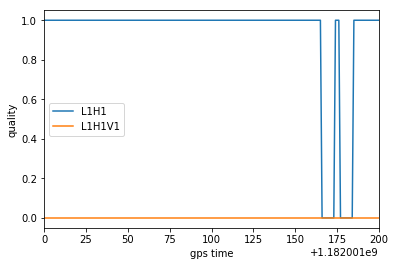

In [25]:
plt.plot(T,L1H1_flag,label='L1H1')
plt.plot(T,L1H1V1_flag,label='L1H1V1')
plt.xlabel('gps time')
plt.ylabel('quality')
plt.legend()
plt.xlim([1182001000,1182001200])
plt.show()

In [27]:
# saving quality segment start time and end time to a txt file

out_file='o2_L1H1V1_quality_segments.txt'
os.system('rm %s'%out_file)
idx = np.where(L1H1V1_flag==1)[0]
with open(out_file, "a") as myfile:
        myfile.write('start\tend\tseg_len\n')
s = idx[0]
for ii in xrange(len(idx)):
    if ii == len(idx)-1:
        e = idx[ii]
        with open(out_file, "a") as myfile:
            myfile.write('%d\t%d\t%d\n'%(T[s],T[e],T[e]-T[s]))
    elif idx[ii+1]-idx[ii]==1:
        continue
    else:
        e = idx[ii]
        with open(out_file, "a") as myfile:
            myfile.write('%d\t%d\t%d\n'%(T[s],T[e],T[e]-T[s]))
        s = idx[ii+1]
        
out_file='o2_L1H1_quality_segments.txt'
os.system('rm %s'%out_file)
idx = np.where(L1H1_flag==1)[0]
with open(out_file, "a") as myfile:
        myfile.write('start\tend\tseg_len\n')
s = idx[0]
for ii in xrange(len(idx)):
    if ii == len(idx)-1:
        e = idx[ii]
        with open(out_file, "a") as myfile:
            myfile.write('%d\t%d\t%d\n'%(T[s],T[e],T[e]-T[s]))
    elif idx[ii+1]-idx[ii]==1:
        continue
    else:
        e = idx[ii]
        with open(out_file, "a") as myfile:
            myfile.write('%d\t%d\t%d\n'%(T[s],T[e],T[e]-T[s]))
        s = idx[ii+1]
    